In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys
sys.path.append("/home/149/ab8992/tasman-tides/")
import ttidelib as tt
import subprocess
import os
from importlib import reload
import xrft 
%matplotlib inline
from dask.distributed import Client
client = Client()
client

: 

## Load the along beam data

In [4]:
output = "01*"
# eta = tt.beamgrid(xr.open_mfdataset(f"/g/data/nm03/ab8992/outputs/full-20/output{output}/surface.nc",decode_times = False).zos)
speed = tt.beamgrid(xr.open_mfdataset(f"/g/data/nm03/ab8992/outputs/full-20/output{output}/surface.nc",decode_times = False).speed)
u = xr.open_mfdataset(f"/g/data/nm03/ab8992/outputs/full-20/output{output}/u/*",decode_times = False).u
v = xr.open_mfdataset(f"/g/data/nm03/ab8992/outputs/full-20/output{output}/v/*",decode_times = False).v
e = xr.open_mfdataset(f"/g/data/nm03/ab8992/outputs/full-20/output{output}/e/*",decode_times = False).e
rho = xr.open_mfdataset(f"/g/data/nm03/ab8992/outputs/full-20/output{output}/rho/*",decode_times = False).rho
bathy = tt.beamgrid(xr.open_mfdataset(f"/g/data/nm03/ab8992/ttide-inputs/full-20/topog_raw.nc",decode_times = False).elevation,xname = "lon",yname = "lat")

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/xesmf/frontend.py:696: UserWarning: Using dimensions ('yh', 'xh') from data variable speed as the horizontal dimensions for the regridding.
  warnings.warn(


In [18]:
data["speed"].TIME.values[10]

3663.0

In [25]:
data["speed"].TIME

<xarray.DataArray 'TIME' (TIME: 240)>
array([3603., 3609., 3615., ..., 5025., 5031., 5037.])
Coordinates:
  * TIME     (TIME) float64 3.603e+03 3.609e+03 ... 5.031e+03 5.037e+03
Attributes:
    units:          hours since 2015-01-01 00:00:00
    long_name:      time
    axis:           T
    calendar_type:  JULIAN
    calendar:       julian
    bounds:         time_bnds

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/xarray/plot/dataarray_plot.py:2026: UserWarning: The following kwargs were not used by contour: 'lineweight'
  primitive = ax.contour(x, y, z, **kwargs)


<Figure size 640x480 with 0 Axes>

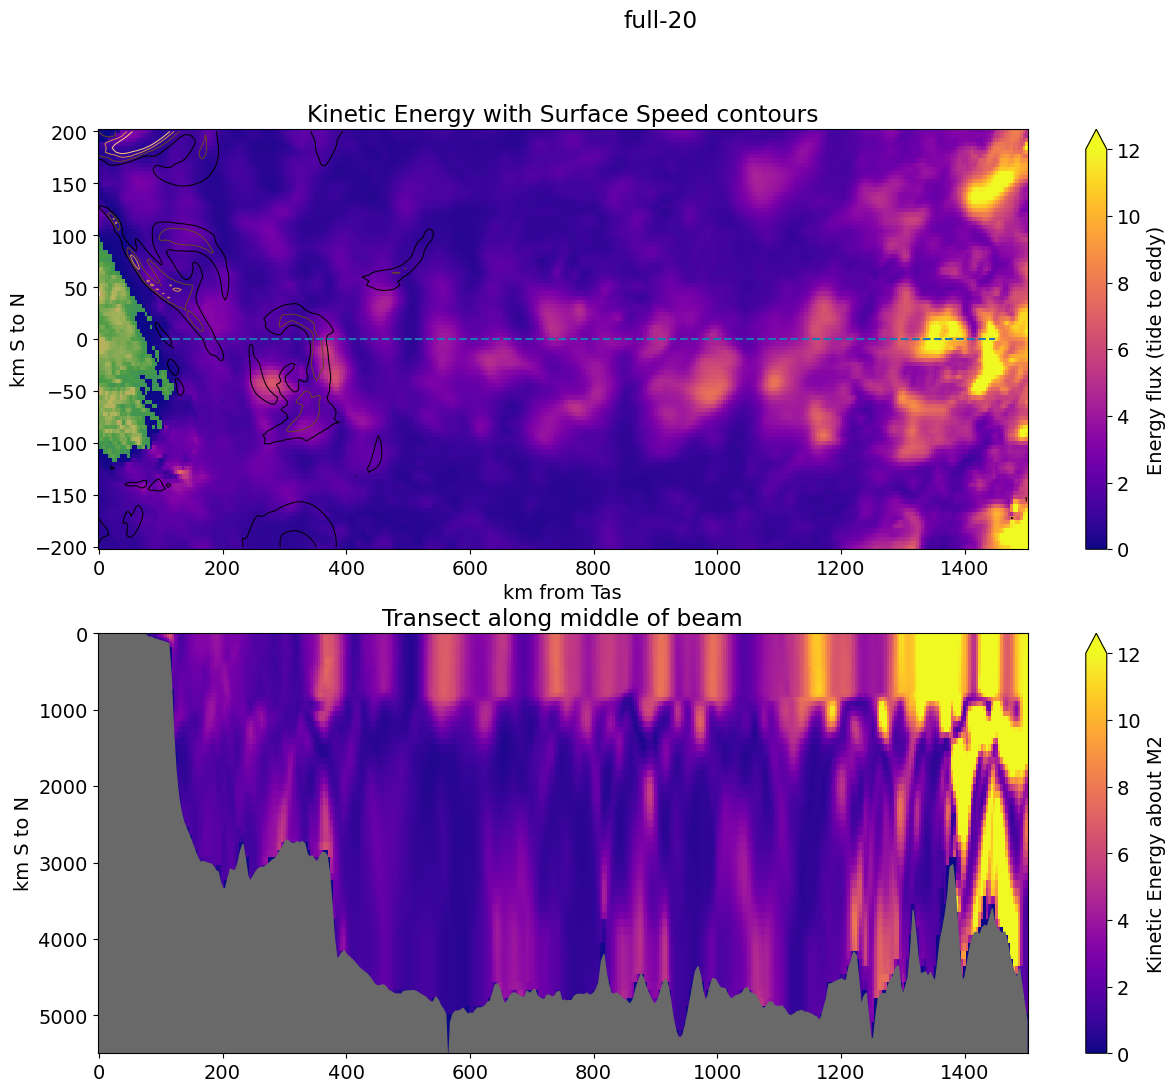

In [22]:
from importlib import reload
reload(tt)
plt.clf()
data = xr.Dataset(
    {"speed":speed.rename({"time":"TIME"}), ## Rename since this dimension is on 6hrs
            "u":u,
            "v":v,
            "bathy":bathy
    }
)
fig = plt.figure(figsize=(15, 12))

tt.plot_ke(data,fig,10)


Making movie and writing to /g/data/v45/ab8992/dropbox/tasman-tides/full-20/movies/test/


/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/xarray/plot/dataarray_plot.py:2026: UserWarning: The following kwargs were not used by contour: 'lineweight'
  primitive = ax.contour(x, y, z, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/xmovie/core.py:348: Use

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/xmovie/core.py:348: UserWarning: The provided `plotfunc` does not provide the expected number of output arguments.            Expected a function `ax,pp =plotfunc(...)` but got %i output arguments. Inserting dummy values. This should not affect output. 
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
2023-11-22 17:02:42,744 - distributed.nanny - WARNING - Restarting worker
2023-11-22 17:02:42,747 - distributed.nanny - WARNING - Restarting worker
2023-11-22 17:02:42,756 - distributed.nanny - WARNING - Restarting worker
2023-11-22 17:02:42,761 - distributed.nanny - WARNING - Restarting worker
2023-11-22 17:02:42,7

KeyboardInterrupt: 

<Figure size 1500x1200 with 0 Axes>

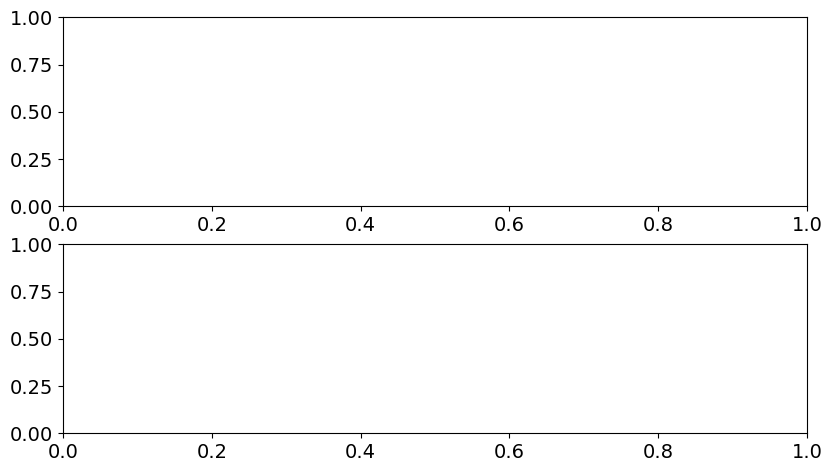

2023-11-22 17:02:43,886 - distributed.nanny - WARNING - Restarting worker
2023-11-22 17:02:43,888 - distributed.nanny - WARNING - Restarting worker
2023-11-22 17:02:43,894 - distributed.nanny - WARNING - Restarting worker
2023-11-22 17:02:43,897 - distributed.nanny - WARNING - Restarting worker
2023-11-22 17:02:43,910 - distributed.nanny - WARNING - Restarting worker
2023-11-22 17:02:43,913 - distributed.nanny - WARNING - Restarting worker
2023-11-22 17:02:43,923 - distributed.nanny - WARNING - Restarting worker


In [ ]:
reload(tt)
data = xr.Dataset(
    {"speed":speed.rename({"time":"TIME"}), ## Rename since this dimension is on 6hrs
            "u":u),
            "v":v),
            "bathy":bathy
    }
)

data

fig = plt.figure(figsize=(15, 12))

# tt.plot_hef(data,fig,50)
tt.make_movie(data,tt.plot_hef,fig,"full-20","test")

## Kinetic Energy


In [6]:
# reload(tt)
data = xr.Dataset(
    {"speed":speed.rename({"time":"TIME"}), ## Rename since this dimension is on 6hrs
            "u":u.isel(time = slice(20,25)),
            "v":v.isel(time = slice(20,25)),
            "bathy":bathy
    }
)


fig = plt.figure(figsize=(15, 12))

# tt.plot_hef(data,fig,50)
tt.make_movie(data,tt.plot_ke,fig,"full-20","ke")

Making movie and writing to /g/data/v45/ab8992/dropbox/tasman-tides/full-20/movies/ke/


/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/xarray/plot/dataarray_plot.py:2026: UserWarning: The following kwargs were not used by contour: 'lineweight'
  primitive = ax.contour(x, y, z, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/xmovie/core.py:348: Use

RuntimeError: Something has gone wrong. Use `verbose=True` to check if ffmpeg displays a problem

<Figure size 1500x1200 with 0 Axes>

## Speed movie

In [8]:
output = "01*"
speed = xr.open_mfdataset(f"/g/data/nm03/ab8992/outputs/full-20/output{output}/surface_transect.nc",decode_times = False,chunks = {"time":1}).speed
if not os.path.exists("/g/data/nm03/ab8992/outputs/full-20/bathy_transect.nc"):
    bathy = tt.beamgrid(xr.open_mfdataset(f"/g/data/nm03/ab8992/ttide-inputs/full-20/topog_raw.nc",decode_times = False).elevation,xname = "lon",yname = "lat")
    bathy.elevation.to_netcdf("/g/data/nm03/ab8992/outputs/full-20/bathy_transect.nc")
else:
    bathy = xr.open_dataset("/g/data/nm03/ab8992/outputs/full-20/bathy_transect.nc")



In [5]:
bathy.elevation.to_netcdf("/g/data/nm03/ab8992/outputs/full-20/bathy_transect.nc")
RuntimeError: Command ffmpeg -r 10 -i "/g/data/v45/ab8992/dropbox/tasman-tides/plot_surfacespeed/movies/speed/frame_%05d.png" -y -c:v libx264 -preset veryslow -crf 10 -pix_fmt yuv420p -r 10 "/g/data/v45/ab8992/dropbox/tasman-tides/plot_surfacespeed/movies/speed/" failed


In [16]:
reload(tt)
import ttidelib as tt
data = xr.Dataset(
    {"speed":speed, ## Rename since this dimension is on 6hrs
            "bathy":bathy.elevation
    }
)


fig = plt.figure(figsize=(15, 12))

# tt.plot_hef(data,fig,50)
tt.make_movie(data,tt.plot_surfacespeed,fig,"plot_surfacespeed","speed",parallel=True)

Making movie and writing to /g/data/v45/ab8992/dropbox/tasman-tides/plot_surfacespeed/movies/speed/


/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/dask/base.py:1402: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(


RuntimeError: Something has gone wrong. Use `verbose=True` to check if ffmpeg displays a problem

<Figure size 1500x1200 with 0 Axes>